In [16]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from times_series_workflow import *
from clean_data import clean
import pandas_ta as ta

In [17]:
#loading data
data=pd.read_csv("data/technical analysis/ta_btc.csv")

In [18]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [19]:
data = data.dropna().copy()

In [20]:
data=data.set_index('open_time')

In [21]:
data.head()

open     high      low    close        volume  \
open_time                                                               
2020-02-29 18:00:00  8651.76  8676.00  8523.55  8523.61   6909.498159   
2020-03-01 00:00:00  8523.61  8675.00  8511.11  8586.83   8957.065560   
2020-03-01 06:00:00  8586.50  8650.00  8518.00  8648.37   8106.169400   
2020-03-01 12:00:00  8647.42  8750.00  8454.57  8500.00  15720.950431   
2020-03-01 18:00:00  8499.87  8591.82  8411.00  8531.88  11108.016388   

                        close_time           qav  num_trades  taker_base_vol  \
open_time                                                                      
2020-02-29 18:00:00  1583020799999  5.959308e+07       82883     3299.843644   
2020-03-01 00:00:00  1583042399999  7.695507e+07      107810     4248.999557   
2020-03-01 06:00:00  1583063999999  6.943837e+07       93946     4135.089393   
2020-03-01 12:00:00  1583085599999  1.348397e+08      159233     7678.727169   
2020-03-01 18:00:00  1583107199999  9.449621e+07      111030     5775.552747   

                     taker_quote_vol  ...         %D  MACD_12_26_9  \
open_time                             ...                            
2020-02-29 18:00:00     2.847155e+07  ...  20.087563   -256.142004   
2020-03-01 00:00:00     3.651435e+07  ...  20.054477   -250.569113   
2020-03-01 06:00:00     3.542417e+07  ...  24.896536   -238.438226   
2020-03-01 12:00:00     6.588392e+07  ...  25.324145   -238.052508   
2020-03-01 18:00:00     4.913982e+07  ...  23.534682   -232.494325   

                     MACDh_12_26_9  MACDs_12_26_9  conversion_line  base_line  \
open_time                                                                       
2020-02-29 18:00:00      -3.432722    -252.709282          9060.00   9410.000   
2020-03-01 00:00:00       1.712135    -252.281248          9060.00   9359.590   
2020-03-01 06:00:00      11.074418    -249.512644          9060.00   9352.485   
2020-03-01 12:00:00       9.168108    -247.220617          8935.51   9347.500   
2020-03-01 18:00:00      11.781033    -244.275358          8894.22   9330.500   

                     lead_span_A  lead_span_B  lagging_span         CCI  
open_time                                                                
2020-02-29 18:00:00       9862.5       8286.5       8741.53 -119.532854  
2020-03-01 00:00:00       9862.5       8286.5       8309.91  -95.418354  
2020-03-01 06:00:00       9862.5       8286.5       8033.31  -74.707898  
2020-03-01 12:00:00       9862.5       8286.5       7932.05  -89.605892  
2020-03-01 18:00:00       9862.5       8286.5       7804.92 -119.003329  

[5 rows x 23 columns]

In [6]:
X=data.drop(columns=["close"])
y=data["close"]

In [14]:
# Define the LSTM model
# model = Sequential()
# model.add(LSTM(64, activation='tanh',return_sequences = True, kernel_regularizer=L1L2(l1=0.05, l2=0.05), input_shape=(X_train_reshaped.shape[1], 1)))
# model.add(Dense(1))

In [15]:
#model.compile(optimizer='adam', loss='mse')

In [14]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.layers import Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import LSTM

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data to be in the range (0, 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to be compatible with LSTM (number of samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the LSTM model
def init_model(X_train,y_train):
    
    # $CHALLENGIFY_BEGIN    
        
    # 1 - RNN architecture
    # ======================  
    model = Sequential()
    
    ## 1.1 - Recurrent Layer
    model.add(LSTM(64, activation='tanh',return_sequences = True, kernel_regularizer=L1L2(l1=0.05, l2=0.05), 
                   input_shape=(X_train_reshaped.shape[1], 1)))
    ## 1.2 - Predictive Dense Layers
    #output_length = y_train.shape[1]
    model.add(Dense(1, activation='linear'))

    # 2 - Compiler
    # ======================    
    adam = optimizers.Adam(learning_rate=0.02)    
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])
    
    
    
    return model
    # $CHALLENGIFY_END


#Early stopping
from tensorflow import keras
from keras.callbacks import EarlyStopping

def fit_model(model, verbose=1):

    # $CHALLENGIFY_BEGIN
    es = EarlyStopping(monitor = "val_loss",
                      patience = 3,
                      mode = "min",
                      restore_best_weights = True)

    print(X_train.shape)
    history = model.fit(X_train, y_train,
                        shuffle = False,
                        batch_size = 32,
                        epochs = 50,
                        callbacks = [es],
                        verbose = verbose)

    return model, history


# 1 - Initialising the RNN model
# ====================================

model = init_model(X_train, y_train)
model.summary()
adam = optimizers.Adam(learning_rate=0.02)    
#model.compile(loss='mse', optimizer=adam, metrics=["mae"])
model.compile()

# 2 - Training
# ====================================
model, history = fit_model(model)


# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test)

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)

print("Loss:", loss)
print("Predictions:", predictions)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 22, 64)            16896     
                                                                 
 dense_2 (Dense)             (None, 22, 22)            1430      
                                                                 
 dense_3 (Dense)             (None, 22, 1)             23        
                                                                 
Total params: 18,349
Trainable params: 18,349
Non-trainable params: 0
_________________________________________________________________
(3772, 22)
Epoch 1/50
118/118 [==============================] - 1s 2ms/step - loss: 0.3829
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 4/50
118/118 [==============================] - 0s 2ms

In [15]:
# import keras
# def init_model(shape):
#   inputs=keras.Input(shape=shape)
#   hidden=keras.layers.LSTM(64)(inputs, input_shape=(None, 22))
#   out=keras.layers.Dense(1)(hidden)
#   model=keras.Model(inputs=inputs, outputs=out)
#   return model

ValueError: x and y can be no greater than 2D, but have shapes (943,) and (943, 22, 1)

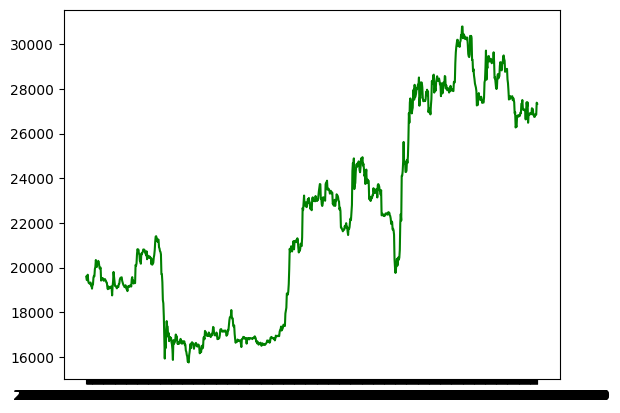

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training data
#plt.plot(y_train, color='blue', label='Training Data', )

# Plotting the test data
plt.plot( y_test, color='green', label='Test Data')

# Plotting the predictions
plt.plot(predictions, color='red', label='Predictions')

# Set the labels and title of the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.layers import Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import LSTM

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data to be in the range (0, 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to be compatible with LSTM (number of samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the LSTM model
def init_model():
    
    model = Sequential()
    
    model.add(LSTM(64, activation='tanh', return_sequences=True, kernel_regularizer=L1L2(l1=0.05, l2=0.05), 
                   input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(Dense(1, activation='linear'))

    adam = optimizers.Adam(learning_rate=0.02)    
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])
    
    return model

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

def fit_model(model, verbose=1):
    es = EarlyStopping(monitor="val_loss", patience=3, mode="min", restore_best_weights=True)
  return model, history

In [23]:
# Initialize the LSTM model
model = init_model()
model.summary()

# Train the model
model, history = fit_model(model)

# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test)

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)

print("Loss:", loss)
print("Predictions:", predictions)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, predictions.flatten(), label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 22, 64)            16896     
                                                                 
 dense_4 (Dense)             (None, 22, 1)             65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


TypeError: cannot unpack non-iterable NoneType object